In [1]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from focal_loss import BinaryFocalLoss

**Load the dataset**

In [2]:
multiclass_test = pd.read_csv("../../dataset/multiclass_test.csv",header= 0)
multiclass_training = pd.read_csv("../../dataset/multiclass_training.csv", header= 0)

In [ ]:
#To observe the distribution of the observation w.r.t. CancerType

#y_train_new.sum() 
#y_test_new2.sum()

Gastrointestinal    46
Genitals            22
Muscle-Bone         21
Neuro               31
Breast               7
Head_Neck           14
Blood               19
Urinario            12
Lung                30
dtype: int64

In [3]:
y_test = pd.get_dummies(multiclass_test, columns = ['label']).iloc[:,17395:17405]
X_train = np.array(multiclass_training.drop(['label','Unnamed: 0','DepMap_ID'], axis = 1))
y_train = pd.get_dummies(multiclass_training, columns = ['label']).iloc[:,17395:17405]
X_test = np.array(multiclass_test.drop(['label','DepMap_ID','Unnamed: 0'], axis = 1))

In [4]:
X_train_reshaped = X_train.reshape(817,17393)
X_test_reshaped = X_test.reshape(205,17393)

**First model**

In [13]:
model = Sequential()

model.add(Dense(200, input_shape=(17393,)))
model.add(Activation('relu'))
#model.add(Dropout(0.25))


model.add(Dense(10))
model.add(Activation('softmax'))
#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 5, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =30,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))

#in multiclass possiamo aggiungere la softmax come activation function in modo da aumentare la probabilità che solo
#un nodo di uscita venga scelto ogni volta
#se per caso due possibili risultati sono anche parzialmente sovrapponibili si usa come activation function sigmoid

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/30


2021-11-26 18:44:45.452736: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-26 18:44:45.453513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-26 18:44:45.637983: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-26 18:44:45.640994: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-26 18:44:45.756784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 17ms/step - loss: 3.0868 - accuracy: 0.2313 - val_loss: 2.0127 - val_accuracy: 0.2780

Epoch 00001: saving model to best_model.hdf5
Epoch 2/30
 1/26 [>.............................] - ETA: 0s - loss: 1.7521 - accuracy: 0.2812

2021-11-26 18:44:46.654532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 12ms/step - loss: 1.6362 - accuracy: 0.4443 - val_loss: 1.8603 - val_accuracy: 0.4341

Epoch 00002: saving model to best_model.hdf5
Epoch 3/30
26/26 [==============================] - 0s 13ms/step - loss: 1.2679 - accuracy: 0.6206 - val_loss: 1.4236 - val_accuracy: 0.5463

Epoch 00003: saving model to best_model.hdf5
Epoch 4/30
26/26 [==============================] - 0s 12ms/step - loss: 0.9712 - accuracy: 0.7295 - val_loss: 1.2778 - val_accuracy: 0.6195

Epoch 00004: saving model to best_model.hdf5
Epoch 5/30
26/26 [==============================] - 0s 12ms/step - loss: 0.7434 - accuracy: 0.8482 - val_loss: 1.2600 - val_accuracy: 0.5854

Epoch 00005: saving model to best_model.hdf5
Epoch 6/30
26/26 [==============================] - 0s 12ms/step - loss: 0.6100 - accuracy: 0.8874 - val_loss: 1.2046 - val_accuracy: 0.6488

Epoch 00006: saving model to best_model.hdf5
Epoch 7/30
26/26 [==============================] - 0s 12ms/step - loss: 0.5

**More complex model: increase width and depth**

In [5]:
model = Sequential()

#1°layer
model.add(Dense(400, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(10))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =100,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-11-27 18:55:31.083636: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-27 18:55:31.084565: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-27 18:55:31.471028: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-27 18:55:31.474104: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


TypeError: in user code:

    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /Users/laburd/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: __init__() takes 2 positional arguments but 3 were given


**Performance on test**

In [86]:
#To predict only the best model

from keras.models import load_model

best_model = load_model('best_model.hdf5')
y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred)
y_pred

2021-11-26 19:38:56.014102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,1,0,0,0
201,0,0,0,0,1,0,0,0,0,0
202,0,0,0,0,1,0,0,0,0,0
203,0,0,0,0,1,0,0,0,0,0


In [93]:
#Create the vectors that contains the Cancers chosen (Cancer_Type2) and the one observed (Cancer_Type)
Cancer_Type = ["Others", "Gastrointestinal","Genitals","Muscle-Bone","Neuro","Breast",
               "Head_Neck","Blood","Urinario","Lung"]


- Gastrointestinal: 1

- Genitals: 2

- Muscle-Bone: 3

- Neuro: 4

- Breast: 5

- Head_Neck: 6

- Blood: 7

- Urinario: 8

- Lung: 9

- Others: 0

In [94]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

In [95]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[202,   0],
        [  2,   1]],

       [[149,  10],
        [ 16,  30]],

       [[177,   6],
        [  6,  16]],

       [[174,  10],
        [  6,  15]],

       [[163,  11],
        [  3,  28]],

       [[198,   0],
        [  2,   5]],

       [[185,   6],
        [  7,   7]],

       [[186,   0],
        [  0,  19]],

       [[192,   1],
        [  9,   3]],

       [[154,  21],
        [ 14,  16]]])

In [96]:
y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]
np.unique(y_test_confusion)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_confusion,y_pred)
cm

array([[ 1,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  1,  3,  0,  0,  2,  0,  0, 10],
       [ 0,  0, 16,  0,  3,  0,  0,  0,  0,  3],
       [ 0,  1,  1, 15,  3,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2, 28,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  2,  0,  7,  0,  1,  3],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  3,  2,  0,  2,  0,  0,  0,  3,  2],
       [ 0,  5,  2,  3,  1,  0,  3,  0,  0, 16]])

In [110]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                fontsize = 15,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

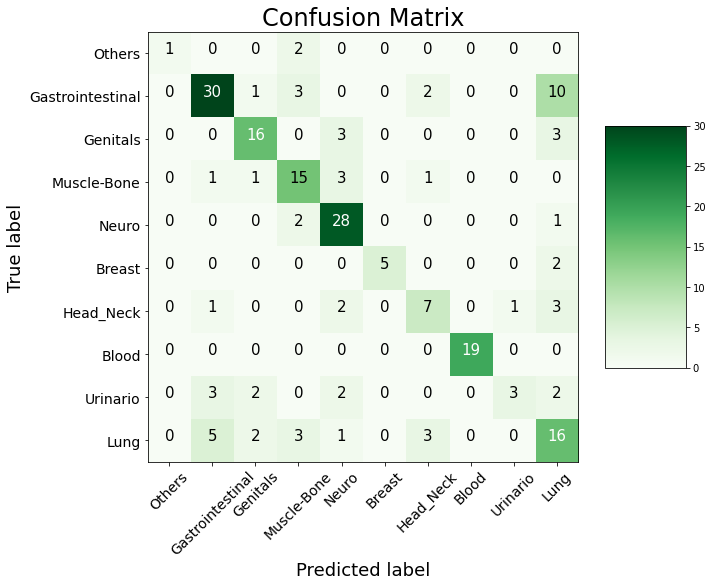

In [108]:
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')